This notebook carries out the analysis and visualization of a proteomics quantification.

Biological context: \
_Dox induces expression of the constructs (SMO-WT, SMO-R173C and SMO-D95N). ATDC5 cells are the parental cells and 1C12 are cells where SMO has been knocked out._

The proposed contrasts are:

`ATDC5 CTRL`		

**contrast 1a** \
`ICI2 WT DOX`	\
`ICI2 WT CTRL` 

**contrast 1b** \
`ICI2 EV DOX` \
`ICI2 EV CTRL`
		
**contrast 2** \
`ICI2 D95N DOX` \
`ICI2 D95N CTRL` 	

**contrast 3** \
`ICI2 R173C DOX` \
`ICI2 R173C CTRL`	

In [1]:
import pandas, numpy

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition
import scipy, scipy.signal

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.family':'sans-serif',
                            'font.size':20, 
                            'xtick.labelsize':20, 
                            'ytick.labelsize':20, 
                            'figure.figsize':(16*(3/4), 9*(3/4)), 
                            'axes.labelsize':20})

# user-defined variables

In [4]:
inputdatafile = '/Users/adrian/projects/akureyri/data/SARA_NOV_PRTs_mousePRoteomc.csv'

In [5]:
metadata = {}
metadata['ATDC5_CTRL'] = ['20220902_Sara_015', '20220902_Sara_025']

metadata['ICI2_WT_DOX'] = ['20220902_Sara_011', '20220902_Sara_021']
metadata['ICI2_WT_CTRL'] = ['20220902_Sara_017', '20220902_Sara_027']

metadata['ICI2_EV_DOX'] = ['20220902_Sara_020', '20220902_Sara_030']
metadata['ICI2_EV_CTRL'] = ['20220902_Sara_016', '20220902_Sara_026']

metadata['ICI2_D95N_DOX'] = ['20220902_Sara_023', '20220902_Sara_033']
metadata['ICI2_D95N_CTRL'] = ['20220902_Sara_019', '20220902_Sara_029']

metadata['ICI2_R173C_DOX'] = ['20220902_Sara_022', '20220902_Sara_032']
metadata['ICI2_R173C_CTRL'] = ['20220902_Sara_018', '20220902_Sara_028']

# read information

In [6]:
all_sample_names = [element for sublist in list(metadata.values()) for element in sublist]
print(all_sample_names)
print(len(all_sample_names))

['20220902_Sara_015', '20220902_Sara_025', '20220902_Sara_011', '20220902_Sara_021', '20220902_Sara_017', '20220902_Sara_027', '20220902_Sara_020', '20220902_Sara_030', '20220902_Sara_016', '20220902_Sara_026', '20220902_Sara_023', '20220902_Sara_033', '20220902_Sara_019', '20220902_Sara_029', '20220902_Sara_022', '20220902_Sara_032', '20220902_Sara_018', '20220902_Sara_028']
18


In [7]:
df = pandas.read_csv(inputdatafile, index_col=0, skiprows=2, usecols=range(30)) # 30 is because we dont need the raw intensities
print(df.shape)
df

(5011, 29)


,Peptide count,Unique peptides,Confidence score,Anova (p),q Value,Max fold change,Power,Highest mean condition,Lowest mean condition,Mass,...,20220902_Sara_018,20220902_Sara_028,20220902_Sara_019,20220902_Sara_029,20220902_Sara_020,20220902_Sara_030,20220902_Sara_022,20220902_Sara_032,20220902_Sara_023,20220902_Sara_033
Accession,,,,,,,,,,,,,,,,,,,,,
Q9CWH6,23,4,173.4172,0.999996,0.866103,1.073632,0.052689,ATDC5 CTRL,ICI2 EV DOX,28036.9819,...,2176.925326,2844.088587,2064.517526,2759.037821,1878.429829,2832.051865,2130.221266,2780.947365,2050.380763,2910.147478
Q9EPU4,40,9,220.5823,0.913823,0.853456,1.087923,0.109340,ICI2 R173C DOX,ICI2 D95N CTRL,162129.9761,...,9594.498328,10556.029707,9429.799666,10170.310085,9593.198325,10435.563439,10299.556247,11023.846052,9386.872545,11248.081729
Q80TM9,34,10,180.8971,0.937843,0.853456,1.105158,0.101099,ATDC5 CTRL,ICI2 R173C CTRL,176608.9373,...,12127.793390,12830.530396,12478.420947,13712.549971,11854.071212,14330.470381,12118.319218,15341.242012,11755.671126,13679.595565
Q9CZW5,44,10,255.7201,0.789281,0.853456,1.105195,0.146035,ICI2 EV CTRL,ICI2 D95N DOX,68331.6584,...,10052.355886,9362.556782,9292.571909,10341.155864,8914.785620,10741.729755,10387.409237,9520.429100,8935.715547,9128.050143
Q3UFM5,17,3,85.5224,0.998441,0.864982,1.105416,0.063949,ICI2 EV DOX,ATDC5 CTRL,96587.3734,...,5428.592579,6783.682950,5236.150389,6489.079572,5659.711021,6715.644364,4355.370291,6959.813365,4973.315183,6854.713306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q64522,7,0,83.4868,NaN,NaN,NaN,NaN,---,---,14013.3593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q64523;Q6GSS7,11,0,135.0741,NaN,NaN,NaN,NaN,---,---,13988.3928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q64524,15,0,126.5455,NaN,NaN,NaN,NaN,---,---,13993.2843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# data quality exploration

/Users/adrian/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


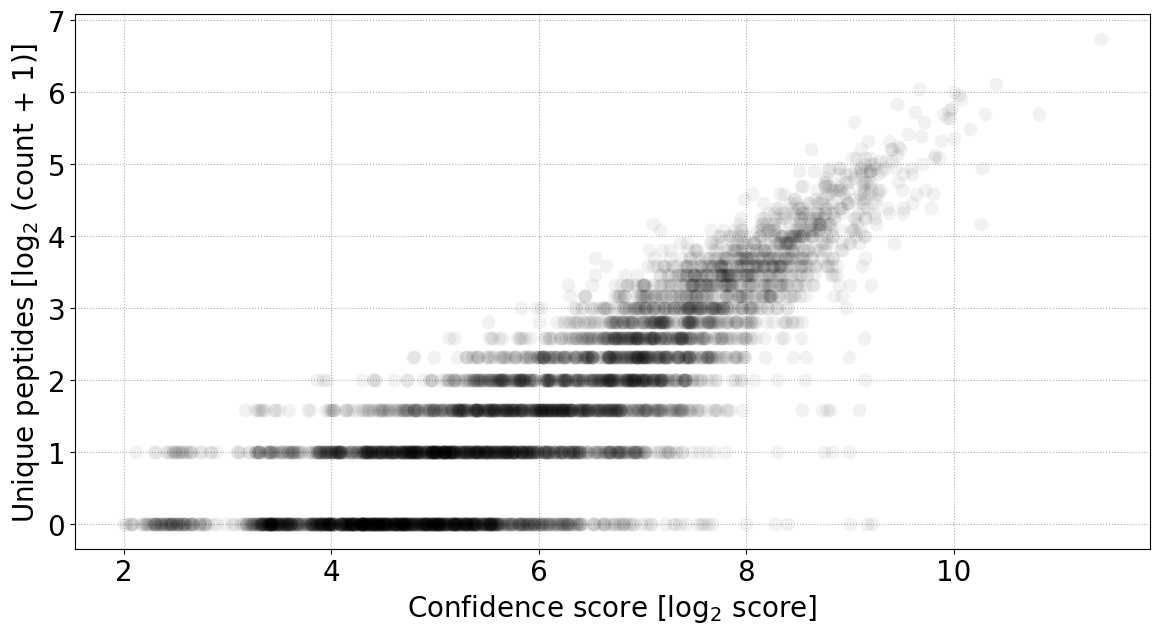

In [8]:
x = numpy.log2(df['Confidence score'])
y = numpy.log2(df['Unique peptides']+1)
               
matplotlib.pyplot.plot(x, y, 'o', color='black', alpha=1/20, markeredgecolor='None', ms=10)

matplotlib.pyplot.xlabel('Confidence score [log$_2$ score]')
matplotlib.pyplot.ylabel('Unique peptides [log$_2$ (count + 1)]')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

Arbitrary thresholds for confident identifications (inclusive):

X-axis: log2 CS = 7 which represents a 2**6 = 64 score.
Y-axis: 3 unique peptides represents 2 in log2 unique peptides + 1 scale: log2(3+1) = 2

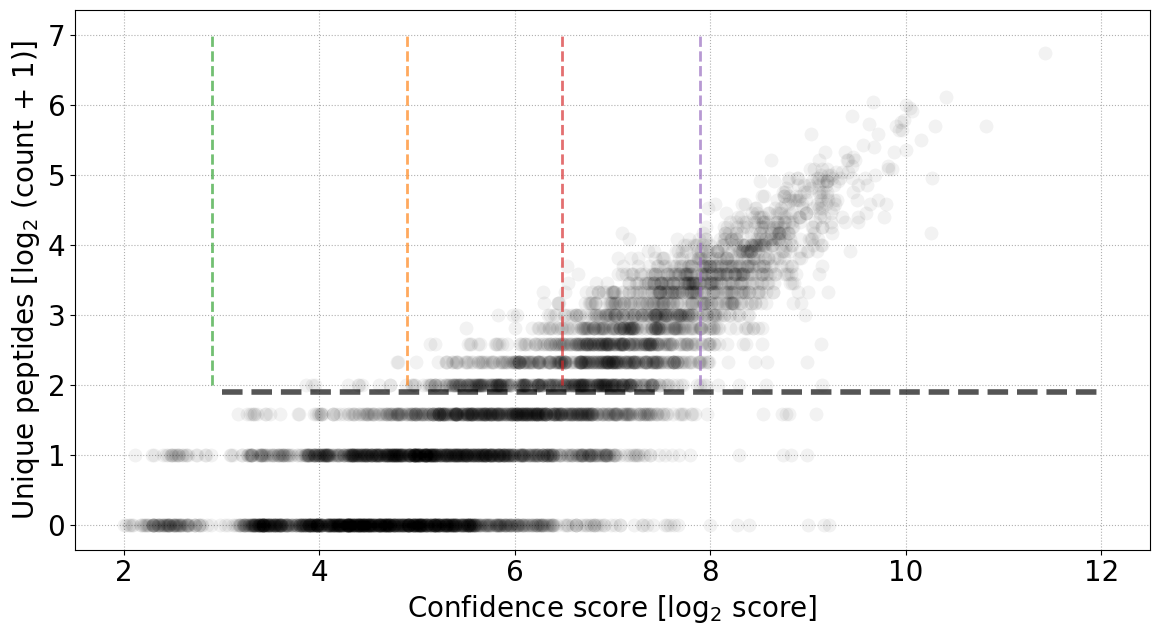

In [9]:
matplotlib.pyplot.plot(x, y, 'o', color='black', alpha=1/20, markeredgecolor='None', ms=10)
matplotlib.pyplot.plot([3, 12], [2-0.1, 2-0.1], ls='--', lw=4, color='black', alpha=2/3)

matplotlib.pyplot.plot([numpy.log2(8)-0.1, numpy.log2(8)-0.1], [2, 7], ls='--', lw=2, color='tab:green', alpha=2/3)
matplotlib.pyplot.plot([numpy.log2(32)-0.1, numpy.log2(32)-0.1], [2, 7], ls='--', lw=2, color='tab:orange', alpha=2/3)
matplotlib.pyplot.plot([numpy.log2(96)-0.1, numpy.log2(96)-0.1], [2, 7], ls='--', lw=2, color='tab:red', alpha=2/3)
matplotlib.pyplot.plot([numpy.log2(256)-0.1, numpy.log2(256)-0.1], [2, 7], ls='--', lw=2, color='tab:purple', alpha=2/3)

matplotlib.pyplot.xlabel('Confidence score [log$_2$ score]')
matplotlib.pyplot.ylabel('Unique peptides [log$_2$ (count + 1)]')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

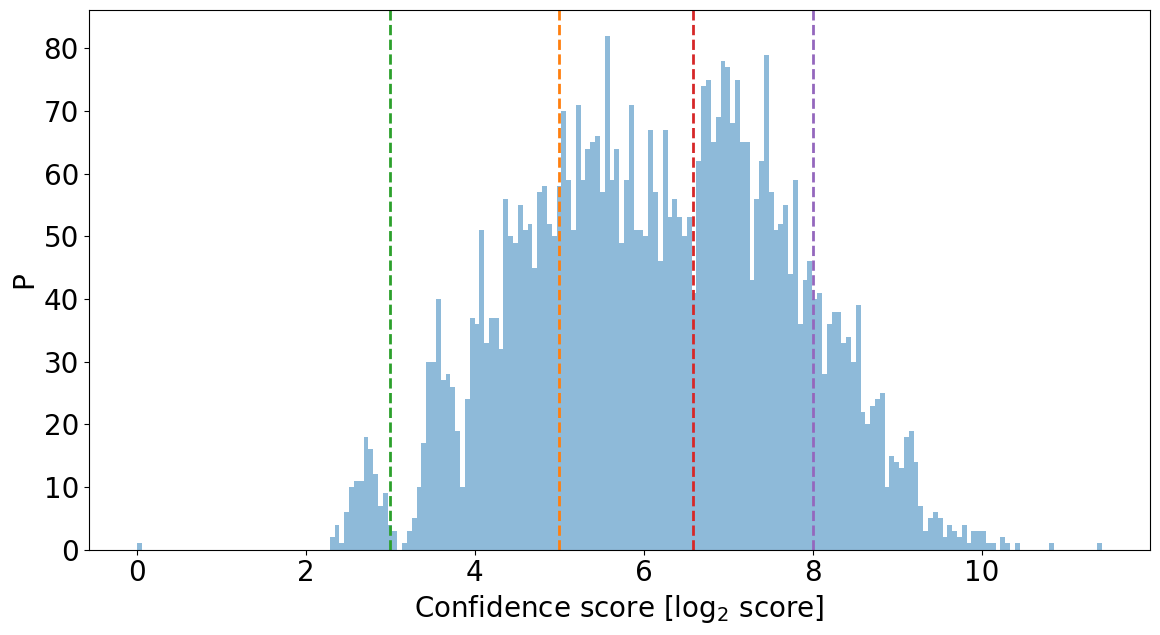

In [10]:
matplotlib.pyplot.hist(numpy.log2(df['Confidence score']+1), bins=200, alpha=1/2)

matplotlib.pyplot.axvline(x=numpy.log2(8), lw=2, ls='--', color='tab:green')
matplotlib.pyplot.axvline(x=numpy.log2(32), lw=2, ls='--', color='tab:orange')
matplotlib.pyplot.axvline(x=numpy.log2(96), lw=2, ls='--', color='tab:red')
matplotlib.pyplot.axvline(x=numpy.log2(256), lw=2, ls='--', color='tab:purple')

matplotlib.pyplot.xlabel('Confidence score [log$_2$ score]')
matplotlib.pyplot.ylabel('P')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

An alternative threshold for confidence score could be 96. More strict

In [11]:
print('confidence 8')
df8 = df[(df['Unique peptides'] >= 3) & (df['Confidence score'] >= 8)]
df8 = numpy.log2(df8.loc[:, all_sample_names] + 1)
print(df8.shape)

print('confidence 32')
df32 = df[(df['Unique peptides'] >= 3) & (df['Confidence score'] >= 32)]
df32 = numpy.log2(df32.loc[:, all_sample_names] + 1)
print(df32.shape)

print('confidence 96')
df96 = df[(df['Unique peptides'] >= 3) & (df['Confidence score'] >= 96)]
df96 = numpy.log2(df96.loc[:, all_sample_names] + 1)
print(df96.shape)

print('confidence 256')
df256 = df[(df['Unique peptides'] >= 3) & (df['Confidence score'] >= 256)]
df256 = numpy.log2(df256.loc[:, all_sample_names] + 1)
print(df256.shape)

confidence 8
(2295, 18)
confidence 32
(2277, 18)
confidence 96
(1840, 18)
confidence 256
(609, 18)


In [19]:
wdf = df96
print(wdf.shape)

(1840, 18)


# visualization pre-normalization

200
19.52376899837422


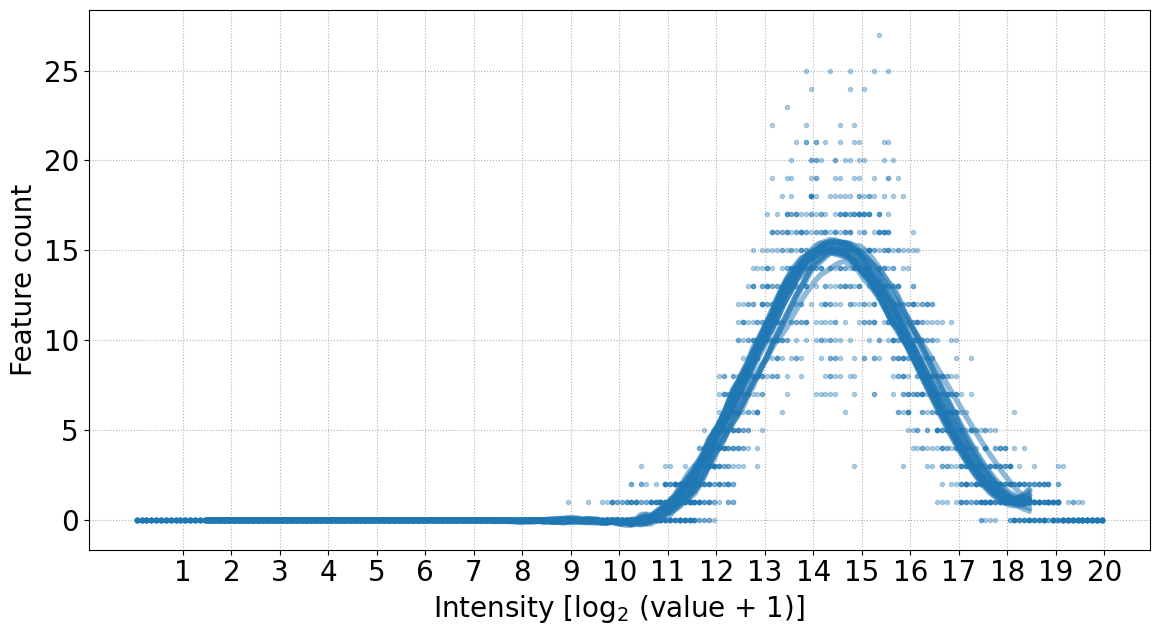

In [13]:
found_max = 20
number_of_bins = found_max * 10
margin = 15
print(number_of_bins)

absolute_max = 0
plotting_x = []; plotting_y = []
most_likely_early = []

for sample in wdf.columns:
        
    intensities = wdf.loc[:, sample]
    
    # histogram
    hist, bin_edges = numpy.histogram(intensities, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    
    # curve fitting
    plotting_x = x[margin:-margin]
    plotting_hist = hist[margin:-margin]
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    
    # storing info to quantify bias
    most_likely_intensity = x[numpy.argmax(yhat)]
    most_likely_early.append(most_likely_intensity)
    
    # plotting
    the_color = 'tab:blue'
    matplotlib.pyplot.plot(x, hist, '.', alpha=1/3, color=the_color)
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha=1/2, color=the_color)
    
    # check
    if max(intensities) > absolute_max:
        absolute_max = max(intensities)

# check print
print(absolute_max)

matplotlib.pyplot.xticks(range(1, 21))
matplotlib.pyplot.xlabel('Intensity [log$_2$ (value + 1)]')
matplotlib.pyplot.ylabel('Feature count')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

[0.44340688 0.22166902]


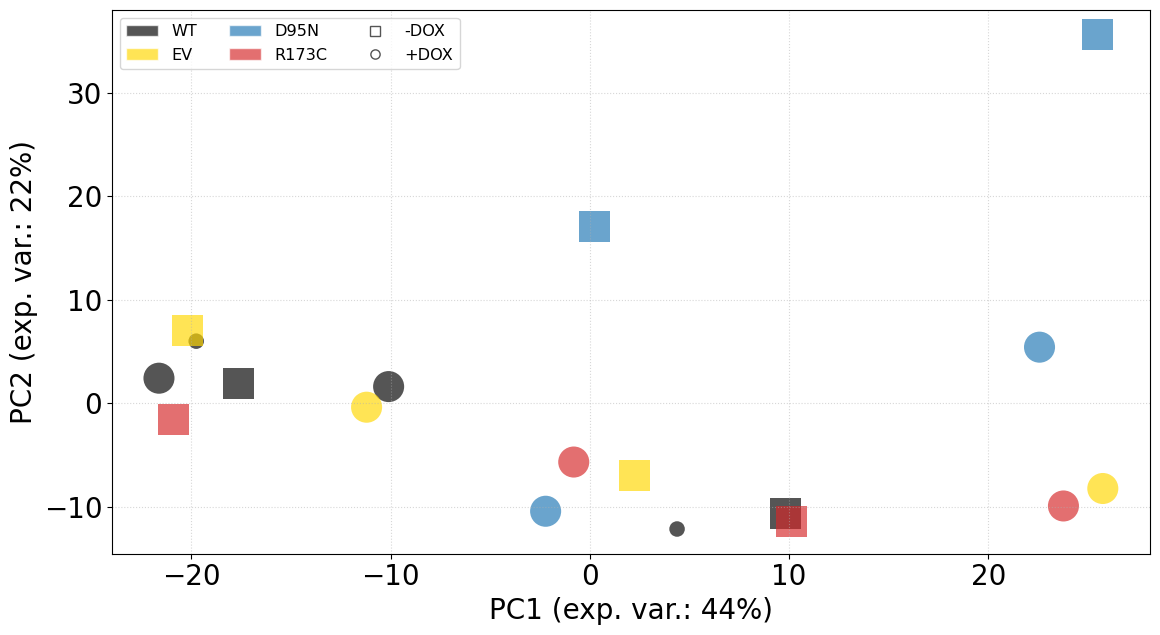

In [14]:
transpose = wdf.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(transpose)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

for i in range(len(locations)):

    # define colors and markers
    if wdf.columns[i] in metadata['ICI2_R173C_DOX']:
        the_color = 'tab:red'; the_marker = 'o'
    elif wdf.columns[i] in metadata['ICI2_R173C_CTRL']:
        the_color = 'tab:red'; the_marker = 's'
        
    elif wdf.columns[i] in metadata['ICI2_D95N_DOX']:
        the_color = 'tab:blue'; the_marker = 'o'
    elif wdf.columns[i] in metadata['ICI2_D95N_CTRL']:
        the_color = 'tab:blue'; the_marker = 's'
        
    elif wdf.columns[i] in metadata['ICI2_EV_DOX']:
        the_color = 'gold'; the_marker = 'o'
    elif wdf.columns[i] in metadata['ICI2_EV_CTRL']:
        the_color = 'gold'; the_marker = 's'

    elif wdf.columns[i] in metadata['ICI2_WT_DOX']:
        the_color = 'black'; the_marker = 'o'
    elif wdf.columns[i] in metadata['ICI2_WT_CTRL']:
        the_color = 'black'; the_marker = 's'

    elif wdf.columns[i] in metadata['ATDC5_CTRL']:
        the_color = 'black'; the_marker = '.'
        
    else:
        raise ValueError('sample not classified')
 
    matplotlib.pyplot.scatter(locations[i,0], locations[i,1], s=500, c=the_color, marker=the_marker, alpha=2/3, edgecolors='none')


legend_elements = [ 
    matplotlib.patches.Patch(facecolor='black', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='gold', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:blue', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white', alpha=2/3),

    matplotlib.lines.Line2D([0], [0], color='white', marker='s', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3),
]
matplotlib.pyplot.legend(legend_elements, ['WT', 'EV', 'D95N', 'R173C', '-DOX', '+DOX'], ncol=3, fontsize='xx-small', markerscale=1/3)
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# normalization 

In [15]:
#
# quantile normalization 
# taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
#

# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(wdf.values, axis=0), index=wdf.index, columns=wdf.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
qndf = wdf.rank(method="min").stack().astype(int).map(df_mean).unstack()

200
19.047562656387115


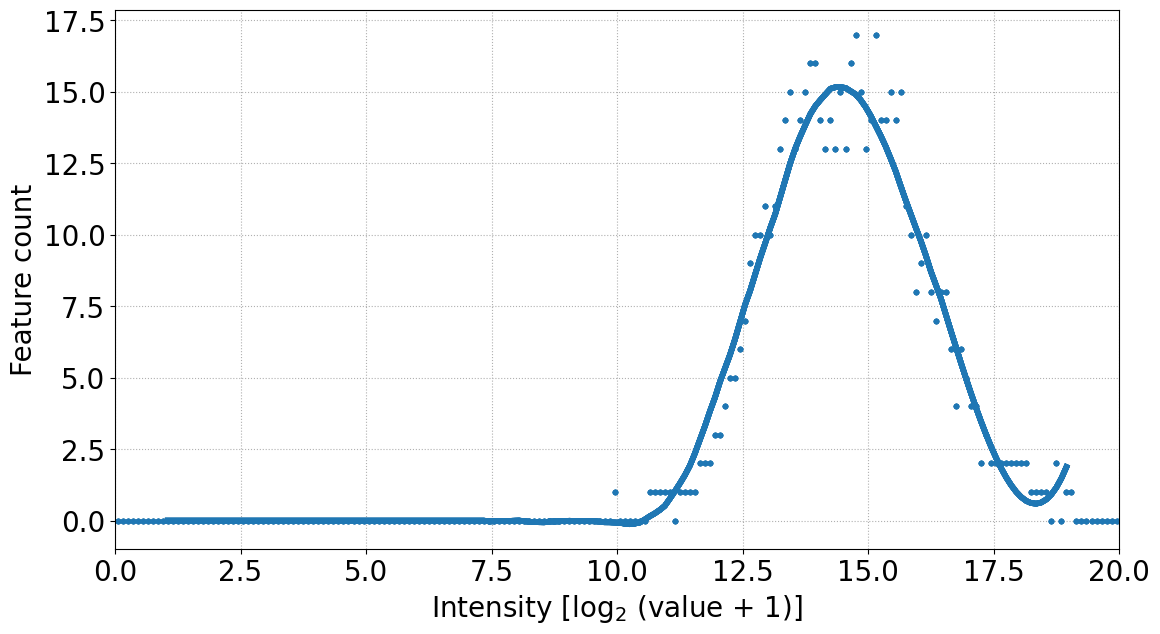

In [16]:
found_max = 20
number_of_bins = found_max * 10
margin = 10
print(number_of_bins)

absolute_max = 0
plotting_x = []; plotting_y = []
most_likely_early = []

for sample in qndf.columns:
        
    intensities = qndf.loc[:, sample]
    
    # histogram
    hist, bin_edges = numpy.histogram(intensities, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    
    # curve fitting
    plotting_x = x[margin:-margin]
    plotting_hist = hist[margin:-margin]
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    
    # storing info to quantify bias
    most_likely_intensity = x[numpy.argmax(yhat)]
    most_likely_early.append(most_likely_intensity)
    
    
    # plotting
    the_color = 'tab:blue'
    matplotlib.pyplot.plot(x, hist, '.', alpha=1/3, color=the_color)
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha=1/2, color=the_color)
    
    # check
    if max(intensities) > absolute_max:
        absolute_max = max(intensities)

# check print
print(absolute_max)
matplotlib.pyplot.xlim(0,20)

matplotlib.pyplot.xlabel('Intensity [log$_2$ (value + 1)]')
matplotlib.pyplot.ylabel('Feature count')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

[0.39760884 0.19065892]


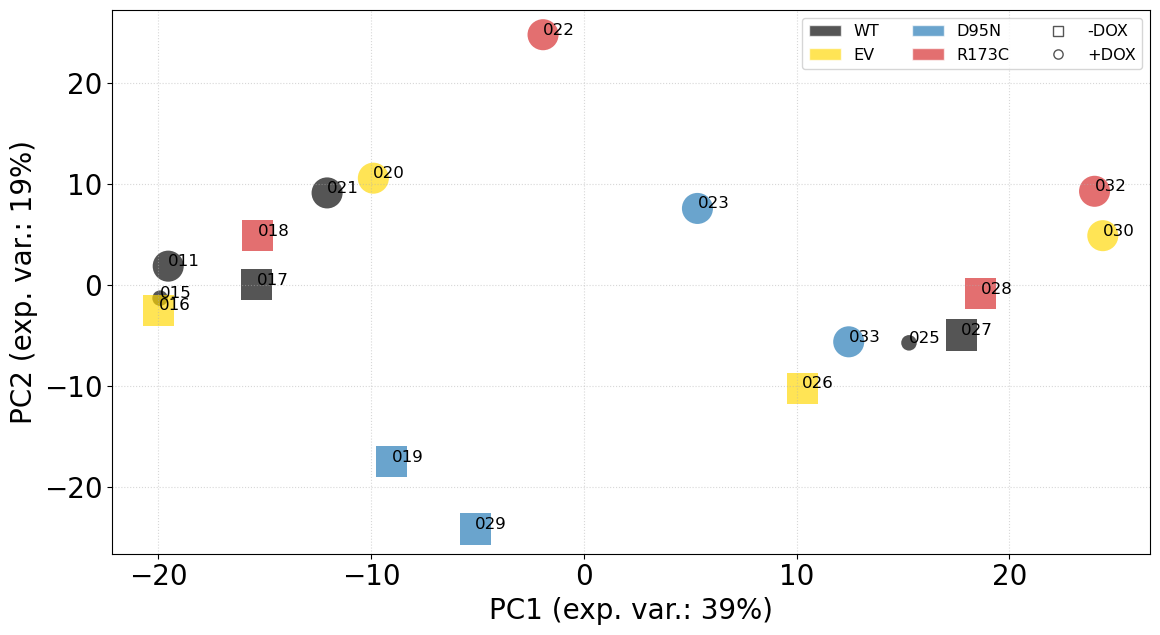

In [23]:
transpose = qndf.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(transpose)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

for i in range(len(locations)):

    # define colors and markers
    if qndf.columns[i] in metadata['ICI2_R173C_DOX']:
        the_color = 'tab:red'; the_marker = 'o'
    elif qndf.columns[i] in metadata['ICI2_R173C_CTRL']:
        the_color = 'tab:red'; the_marker = 's'
        
    elif qndf.columns[i] in metadata['ICI2_D95N_DOX']:
        the_color = 'tab:blue'; the_marker = 'o'
    elif qndf.columns[i] in metadata['ICI2_D95N_CTRL']:
        the_color = 'tab:blue'; the_marker = 's'
        
    elif qndf.columns[i] in metadata['ICI2_EV_DOX']:
        the_color = 'gold'; the_marker = 'o'
    elif qndf.columns[i] in metadata['ICI2_EV_CTRL']:
        the_color = 'gold'; the_marker = 's'

    elif qndf.columns[i] in metadata['ICI2_WT_DOX']:
        the_color = 'black'; the_marker = 'o'
    elif qndf.columns[i] in metadata['ICI2_WT_CTRL']:
        the_color = 'black'; the_marker = 's'

    elif qndf.columns[i] in metadata['ATDC5_CTRL']:
        the_color = 'black'; the_marker = '.'
        
    else:
        raise ValueError('sample not classified')
 
    matplotlib.pyplot.scatter(locations[i,0], locations[i,1], s=500, c=the_color, marker=the_marker, alpha=2/3, edgecolors='none')
    matplotlib.pyplot.text(locations[i,0], locations[i,1], qndf.columns[i].split('_')[-1], fontsize=12)


legend_elements = [ 
    matplotlib.patches.Patch(facecolor='black', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='gold', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:blue', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white', alpha=2/3),

    matplotlib.lines.Line2D([0], [0], color='white', marker='s', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3),
]
matplotlib.pyplot.legend(legend_elements, ['WT', 'EV', 'D95N', 'R173C', '-DOX', '+DOX'], ncol=3, fontsize='xx-small', markerscale=1/3)
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# comparisons

In [18]:
# add the text to compare, make heatmap of consistent differences

Determine the set of features that have more than a one log2 fold change consistently in both replicates. Make venn diagrams and plot histogram

In [ ]:
# venn diagram of EV contrast, D95N and R173C
# venn diagram of what is changing for each of the three conditions
# heatmap of what is changing in EV, D95N and R173C